In [427]:
# Project 2: Student Performance Analytics Dashboard
# Problem Statement: Institutions need early warnings for students who might fail or drop out.

In [428]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [429]:
df = pd.read_csv("E:/AICTE Intern Tasks/RISE/Datasets/2_Student Performance.csv")

In [430]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [431]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [433]:
df.shape

(10, 9)

In [434]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [435]:
# check for null values

df.isnull().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [436]:
# as mentioned in the task we need features - marks, attendance, logins
# here final grade is considered as marks
# attendence rate considered as attendence
# we can simulate login feature login per week

In [437]:
# rename finalgrade column into marks 
df.rename(columns={'FinalGrade': 'Marks'}, inplace=True)

In [438]:
# here 
def grade(mark):
    if mark >= 90:
        return 'A'
    elif mark >= 80:
        return 'B'
    elif mark >= 70:
        return 'C'
    elif mark >= 60:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['Marks'].apply(grade)

In [439]:
print(df[['Name', 'Marks', 'Grade']])

       Name  Marks Grade
0      John     80     B
1     Sarah     87     B
2      Alex     68     D
3   Michael     92     A
4      Emma     85     B
5    Olivia     90     A
6    Daniel     62     D
7    Sophia     78     C
8     James     72     C
9  Isabella     88     B


In [440]:
# rename attendence rate to attendence
df.rename(columns={'AttendanceRate': 'Attendance'}, inplace=True)

In [441]:
# add simulated logins per week feature 

np.random.seed(1)
df['LoginsPerWeek'] = np.random.randint(1, 8, size=len(df))

In [442]:
df.head(3)

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
0,1,John,Male,85,15,78,1,High,80,B,6
1,2,Sarah,Female,90,20,85,2,Medium,87,B,4
2,3,Alex,Male,78,10,65,0,Low,68,D,5


In [443]:
df.describe()

,StudentID,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,Marks,LoginsPerWeek
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000,3.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304,2.043961
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000,1.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000,1.250000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000,3.000000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000,4.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000,6.000000


In [444]:
df.nunique()

StudentID                    10
Name                         10
Gender                        2
Attendance                    9
StudyHoursPerWeek            10
PreviousGrade                10
ExtracurricularActivities     4
ParentalSupport               3
Marks                        10
Grade                         4
LoginsPerWeek                 5
dtype: int64

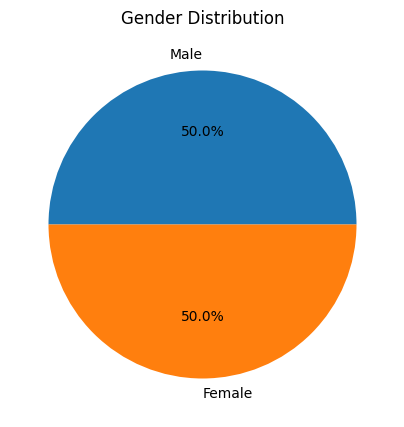

In [445]:
plt.figure(figsize=(5, 5))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [446]:
df['Attendance'].mean()

np.float64(85.6)

In [447]:
df[df['Attendance']>85.6]

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
1,2,Sarah,Female,90,20,85,2,Medium,87,B,4
3,4,Michael,Male,92,25,90,3,High,92,A,1
4,5,Emma,Female,88,18,82,2,Medium,85,B,2
5,6,Olivia,Female,95,30,88,1,High,90,A,4
9,10,Isabella,Female,91,22,86,3,High,88,B,2


In [448]:
df[df['Attendance']<85.6]

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
0,1,John,Male,85,15,78,1,High,80,B,6
2,3,Alex,Male,78,10,65,0,Low,68,D,5
6,7,Daniel,Male,70,8,60,0,Low,62,D,6
7,8,Sophia,Female,85,17,77,1,Medium,78,C,1
8,9,James,Male,82,12,70,2,Low,72,C,1


In [449]:
df['StudyHoursPerWeek'].mean()

np.float64(17.7)

In [450]:
df[df['StudyHoursPerWeek']>17.7]

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
1,2,Sarah,Female,90,20,85,2,Medium,87,B,4
3,4,Michael,Male,92,25,90,3,High,92,A,1
4,5,Emma,Female,88,18,82,2,Medium,85,B,2
5,6,Olivia,Female,95,30,88,1,High,90,A,4
9,10,Isabella,Female,91,22,86,3,High,88,B,2


In [451]:
df[df['PreviousGrade']>78]

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
1,2,Sarah,Female,90,20,85,2,Medium,87,B,4
3,4,Michael,Male,92,25,90,3,High,92,A,1
4,5,Emma,Female,88,18,82,2,Medium,85,B,2
5,6,Olivia,Female,95,30,88,1,High,90,A,4
9,10,Isabella,Female,91,22,86,3,High,88,B,2


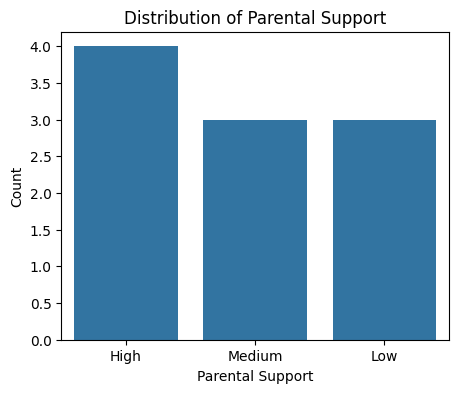

In [452]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='ParentalSupport')
plt.title('Distribution of Parental Support')
plt.xlabel('Parental Support')
plt.ylabel('Count')
plt.show()

In [453]:
low=df[df['ParentalSupport']=='Low']
low

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
2,3,Alex,Male,78,10,65,0,Low,68,D,5
6,7,Daniel,Male,70,8,60,0,Low,62,D,6
8,9,James,Male,82,12,70,2,Low,72,C,1


In [454]:
high=df[df['ParentalSupport']=='High']
high

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
0,1,John,Male,85,15,78,1,High,80,B,6
3,4,Michael,Male,92,25,90,3,High,92,A,1
5,6,Olivia,Female,95,30,88,1,High,90,A,4
9,10,Isabella,Female,91,22,86,3,High,88,B,2


In [455]:
medium=df[df['ParentalSupport']=='Medium']
medium

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
1,2,Sarah,Female,90,20,85,2,Medium,87,B,4
4,5,Emma,Female,88,18,82,2,Medium,85,B,2
7,8,Sophia,Female,85,17,77,1,Medium,78,C,1


In [456]:
df.groupby(['Gender'])['ParentalSupport'].value_counts()

Gender  ParentalSupport
Female  Medium             3
        High               2
Male    Low                3
        High               2
Name: count, dtype: int64

In [457]:
# perform data analysis

# Calculate averages
averages = df[['Attendance', 'StudyHoursPerWeek', 'PreviousGrade', 'LoginsPerWeek', 'Marks']].mean()
print(averages)

Attendance           85.6
StudyHoursPerWeek    17.7
PreviousGrade        78.1
LoginsPerWeek         3.2
Marks                80.2
dtype: float64


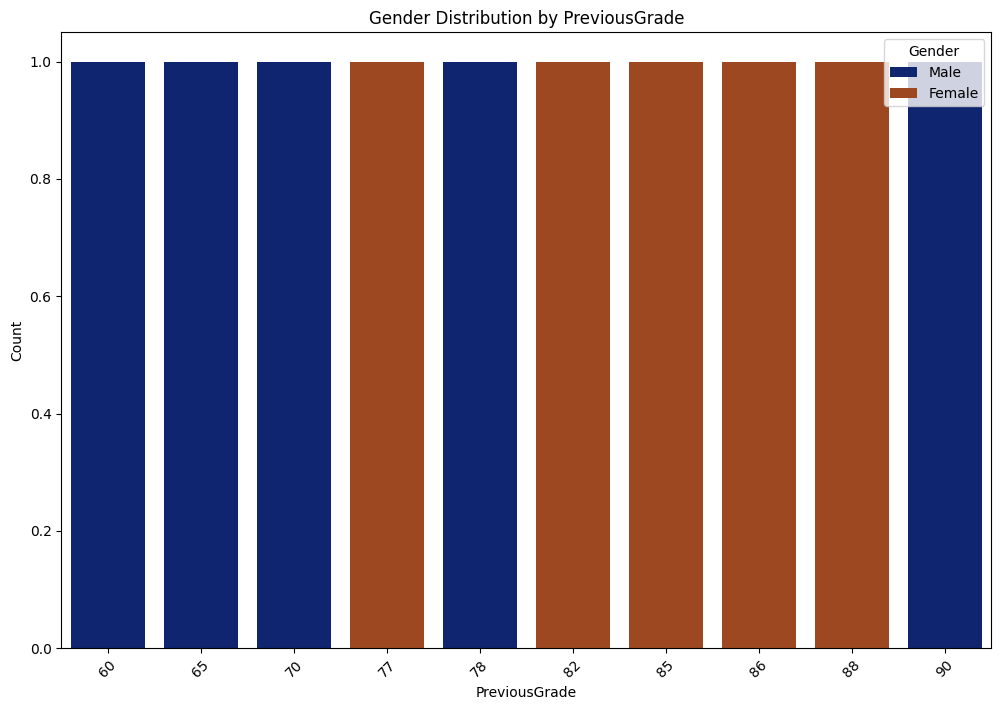

In [458]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='PreviousGrade', hue='Gender', palette='dark')
plt.title('Gender Distribution by PreviousGrade')
plt.xlabel('PreviousGrade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

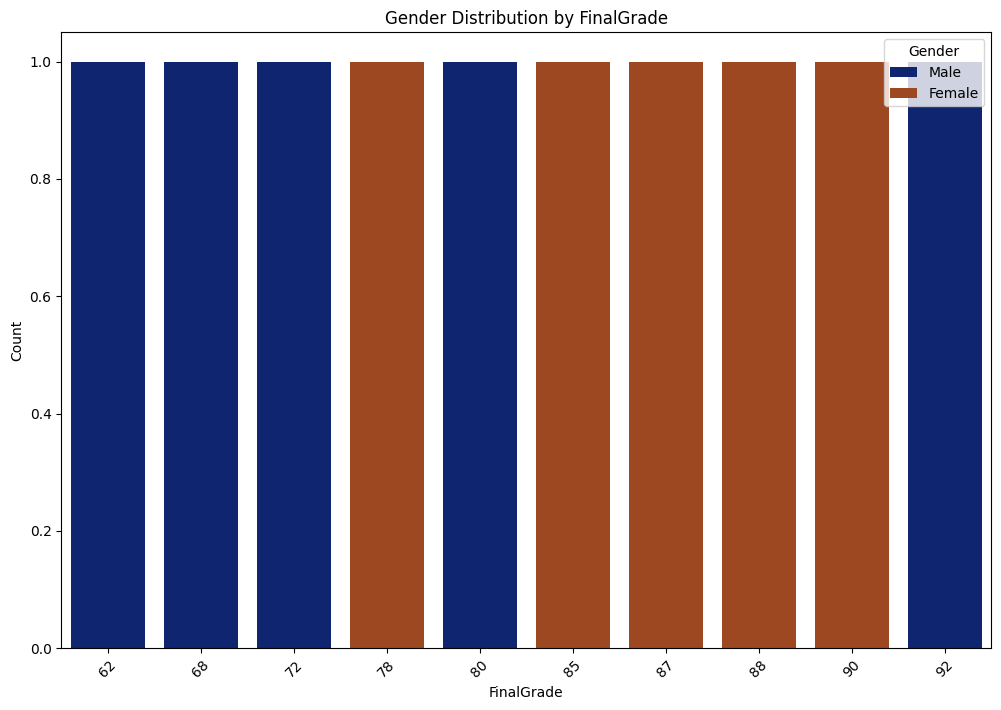

In [459]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Marks', hue='Gender', palette='dark')
plt.title('Gender Distribution by FinalGrade')
plt.xlabel('FinalGrade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='PreviousGrade', ylabel='Marks'>

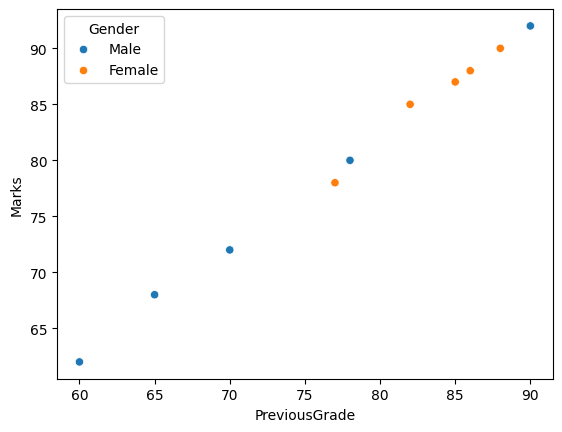

In [460]:
sns.scatterplot(data=df,x='PreviousGrade',y='Marks',hue='Gender')

In [461]:
# Correlation matrix
# Compute correlation only on numeric columns
correlation_matrix = df.select_dtypes(include='number').corr()
df.corr(numeric_only=True)
correlation_matrix

,StudentID,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,Marks,LoginsPerWeek
StudentID,1.000000,-0.064110,0.008038,-0.102841,0.220847,-0.123573,-0.538642
Attendance,-0.064110,1.000000,0.934885,0.973946,0.691172,0.974177,-0.454368
StudyHoursPerWeek,0.008038,0.934885,1.000000,0.930535,0.563286,0.926489,-0.352437
PreviousGrade,-0.102841,0.973946,0.930535,1.000000,0.743432,0.998457,-0.434021
ExtracurricularActivities,0.220847,0.691172,0.563286,0.743432,1.000000,0.743706,-0.704595
Marks,-0.123573,0.974177,0.926489,0.998457,0.743706,1.000000,-0.422081
LoginsPerWeek,-0.538642,-0.454368,-0.352437,-0.434021,-0.704595,-0.422081,1.000000


In [462]:
correlation = df[['Attendance', 'StudyHoursPerWeek', 'PreviousGrade', 'LoginsPerWeek', 'Marks']].corr()
correlation

,Attendance,StudyHoursPerWeek,PreviousGrade,LoginsPerWeek,Marks
Attendance,1.000000,0.934885,0.973946,-0.454368,0.974177
StudyHoursPerWeek,0.934885,1.000000,0.930535,-0.352437,0.926489
PreviousGrade,0.973946,0.930535,1.000000,-0.434021,0.998457
LoginsPerWeek,-0.454368,-0.352437,-0.434021,1.000000,-0.422081
Marks,0.974177,0.926489,0.998457,-0.422081,1.000000


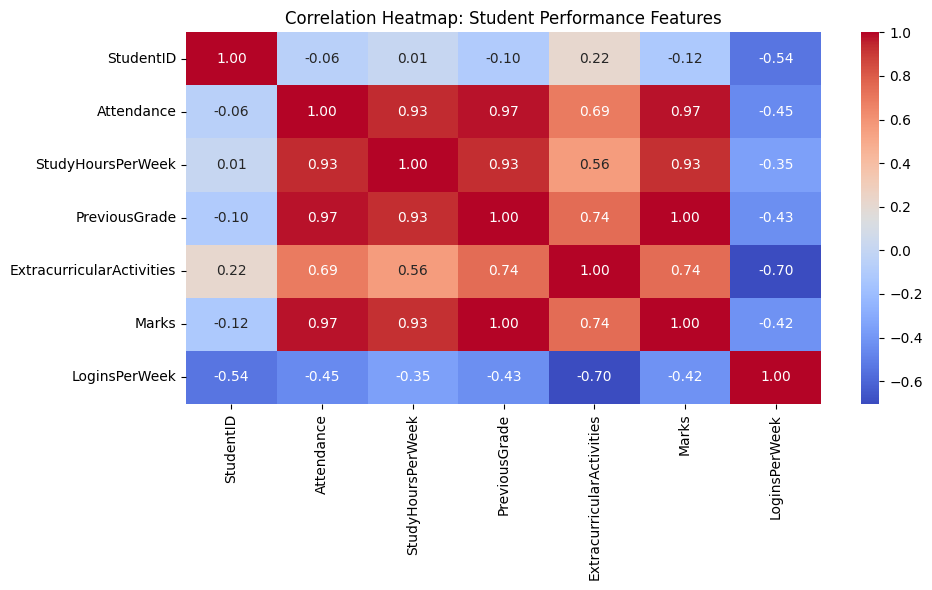

In [463]:
# Heatmap for Feature Correlation

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Student Performance Features")
plt.tight_layout()
plt.show()

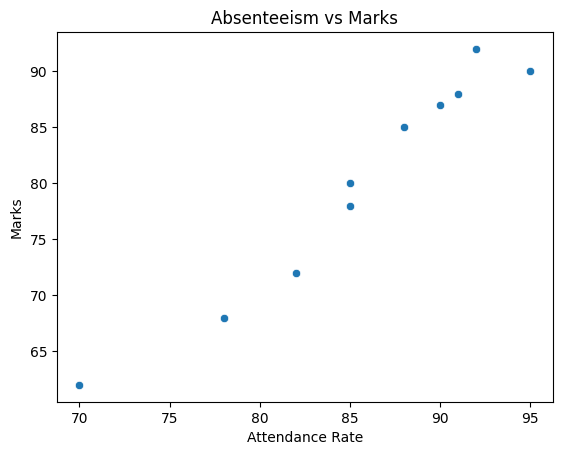

In [464]:
# Absentee Impact

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Attendance', y='Marks', data=df)
plt.title('Absenteeism vs Marks')
plt.xlabel('Attendance Rate')
plt.ylabel('Marks')
plt.show()

In [465]:
df.groupby('Attendance')['StudyHoursPerWeek'].mean().reset_index()

,Attendance,StudyHoursPerWeek
0,70,8.0
1,78,10.0
2,82,12.0
3,85,16.0
4,88,18.0
5,90,20.0
6,91,22.0
7,92,25.0
8,95,30.0


<Axes: xlabel='Attendance', ylabel='StudyHoursPerWeek'>

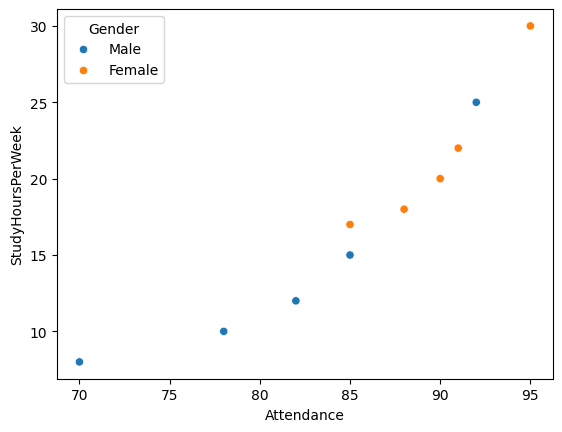

In [466]:
sns.scatterplot(data=df,x='Attendance',y='StudyHoursPerWeek',hue='Gender')

In [467]:
df.groupby('Attendance')['Marks'].mean().reset_index()

,Attendance,Marks
0,70,62.0
1,78,68.0
2,82,72.0
3,85,79.0
4,88,85.0
5,90,87.0
6,91,88.0
7,92,92.0
8,95,90.0


<Axes: xlabel='Attendance', ylabel='Marks'>

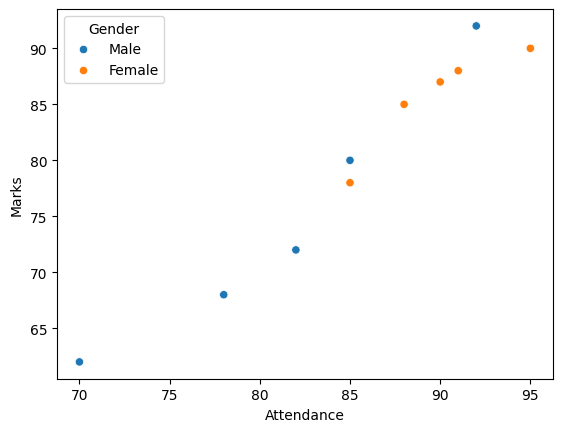

In [468]:
sns.scatterplot(data=df,x='Attendance',y='Marks',hue='Gender')

In [469]:
# Visualize Top vs Struggling Students

# Top vs Struggling (e.g., Marks ≥ 85 are top, < 70 are struggling)
top_students = df[df['Marks'] >= 85]
top_students

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
1,2,Sarah,Female,90,20,85,2,Medium,87,B,4
3,4,Michael,Male,92,25,90,3,High,92,A,1
4,5,Emma,Female,88,18,82,2,Medium,85,B,2
5,6,Olivia,Female,95,30,88,1,High,90,A,4
9,10,Isabella,Female,91,22,86,3,High,88,B,2


In [470]:
struggling_students = df[df['Marks'] < 70]
struggling_students

,StudentID,Name,Gender,Attendance,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Marks,Grade,LoginsPerWeek
2,3,Alex,Male,78,10,65,0,Low,68,D,5
6,7,Daniel,Male,70,8,60,0,Low,62,D,6


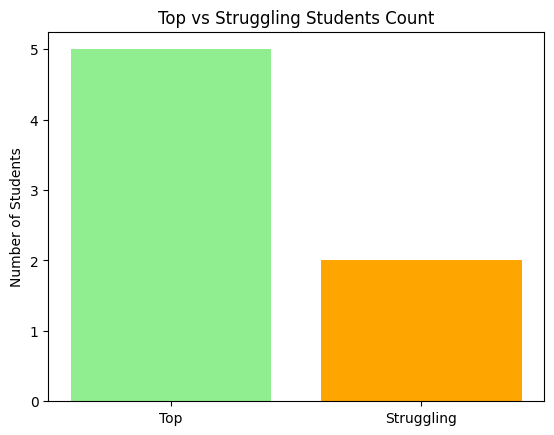

In [471]:
# Bar chart
labels = ['Top', 'Struggling']
counts = [len(top_students), len(struggling_students)]

plt.bar(labels, counts, color=['lightgreen', 'orange'])
plt.title('Top vs Struggling Students Count')
plt.ylabel('Number of Students')
plt.show()


In [472]:
df.to_csv('E:/AICTE Intern Tasks/RISE/Datasets/2_Student Performance_Cleaned.csv', index=False)

In [417]:
# Conclusion

# The dashboard empowers educational institutions to proactively support students, reduce dropout risk, and improve overall academic success 
# through meaningful insights from performance data.

''' 

By analyzing student data such as marks, attendance, study hours, and login activity, the Student Performance Analytics Dashboard successfully:
Identifies at-risk students through low marks, poor attendance, and low engagement (logins).
Reveals strong correlations between factors like attendance, study hours, .
 Provides visual insights (bar charts, scatter plots, heatmaps) that help faculty and administrators:
   a. Spot performance trends
   b. Compare top vs struggling students
   c. Understand absenteeism impact
Enables data-driven academic interventions, such as personalized support, counseling, or attendance improvement programs. 

'''

' \n\nBy analyzing student data such as marks, attendance, study hours, and login activity, the Student Performance Analytics Dashboard successfully:\nIdentifies at-risk students through low marks, poor attendance, and low engagement (logins).\nReveals strong correlations between factors like attendance, study hours, .\n Provides visual insights (bar charts, scatter plots, heatmaps) that help faculty and administrators:\n   a. Spot performance trends\n   b. Compare top vs struggling students\n   c. Understand absenteeism impact\nEnables data-driven academic interventions, such as personalized support, counseling, or attendance improvement programs. \n\n'